In [5]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r'D:\data\covid.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [7]:
df.shape

(23688, 5)

In [8]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [10]:
df.isnull()

,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,False,False
23684,False,False,False,False,False
23685,False,False,False,False,False
23686,False,False,False,False,False


In [11]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

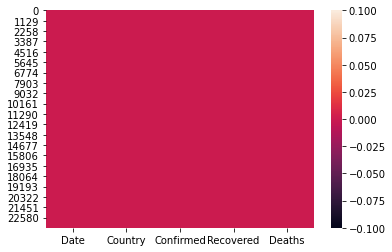

In [12]:
sns.heatmap(df.isnull())

The dataset shows no null values

In [13]:
df.drop(['Date'],inplace=True,axis=1)
df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
...,...,...,...,...
23683,West Bank and Gaza,429,365,3
23684,Western Sahara,9,6,1
23685,Yemen,249,10,49
23686,Zambia,920,336,7


In [14]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [15]:
df['Country'].value_counts()

Chile              126
Kosovo             126
Lithuania          126
Dominica           126
Iran               126
                  ... 
North Macedonia    126
New Zealand        126
Guatemala          126
Ghana              126
Latvia             126
Name: Country, Length: 188, dtype: int64

In [16]:
df.sort_values(by="Country", ascending=True).head(10)

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0,0,0
3760,Afghanistan,0,0,0
9588,Afghanistan,7,0,0
2068,Afghanistan,0,0,0
22936,Afghanistan,9998,1040,216
15792,Afghanistan,784,43,25
376,Afghanistan,0,0,0
19552,Afghanistan,3224,421,95
15604,Afghanistan,714,40,23
3948,Afghanistan,0,0,0


In [17]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()   
df['Country']= label_encoder.fit_transform(df['Country']) 
df['Country'].unique() 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
df.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


In [19]:
df.corr()

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


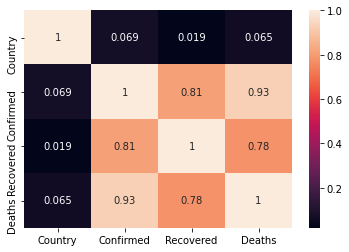

In [20]:
sns.heatmap(df.corr(),annot=True)

Country         AxesSubplot(0.125,0.125;0.168478x0.755)
Confirmed    AxesSubplot(0.327174,0.125;0.168478x0.755)
Recovered    AxesSubplot(0.529348,0.125;0.168478x0.755)
Deaths       AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

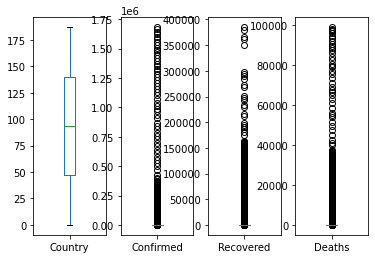

In [21]:
df.plot(kind='box',subplots=True)

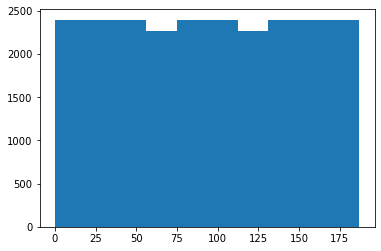

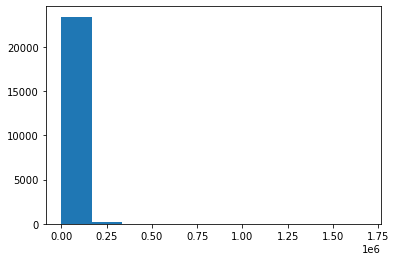

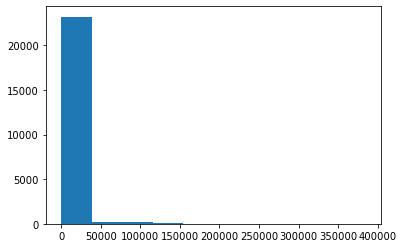

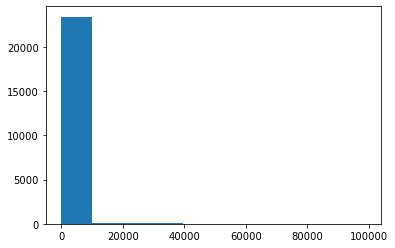

In [22]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

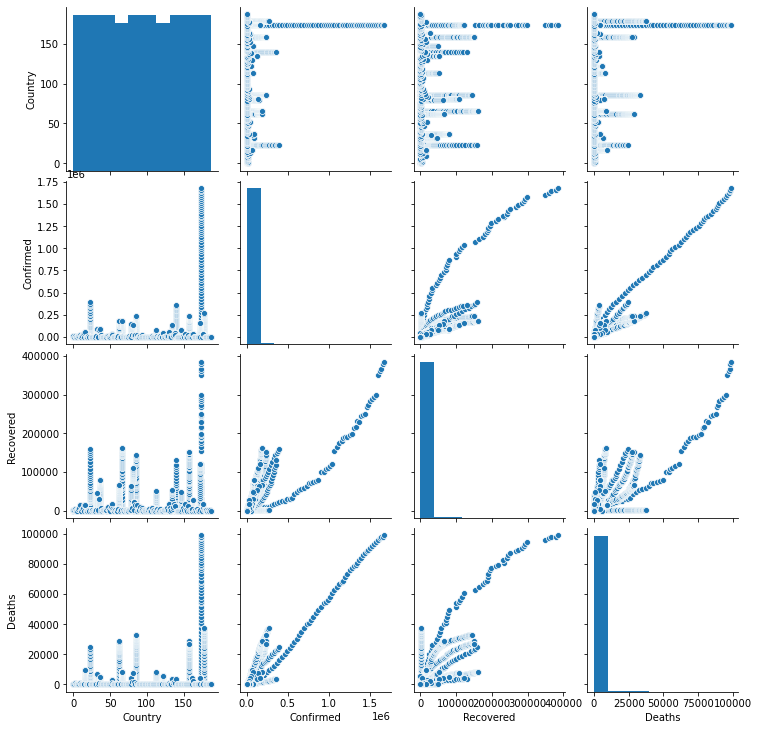

In [23]:
sns.pairplot(df)

The box plot shows outliers are present.The pairplot shows the skewness is present in the data

In [24]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))
z

array([[1.72286214, 0.13641539, 0.17049719, 0.13197356],
       [1.70443581, 0.13641539, 0.17049719, 0.13197356],
       [1.68600948, 0.13641539, 0.17049719, 0.13197356],
       ...,
       [1.68600948, 0.13215314, 0.16983681, 0.11970126],
       [1.70443581, 0.12066732, 0.1483084 , 0.13022038],
       [1.72286214, 0.13545681, 0.16884624, 0.13097174]])

In [27]:
thresold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

The outliers are removed from the data

In [28]:
df=df[(z<3).all(axis=1)]

In [29]:
x=df.drop(['Deaths'],axis=1)
x.head()

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [30]:
y=pd.DataFrame(df['Deaths'])
y.head()

,Deaths
0,0
1,0
2,0
3,0
4,0


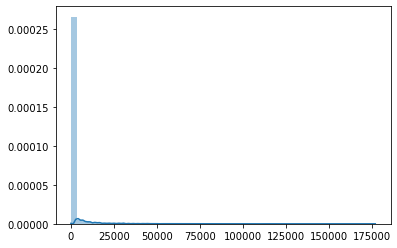

In [31]:
sns.distplot(x)

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

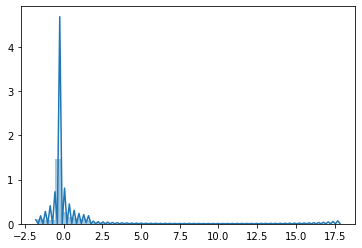

In [33]:
sns.distplot(x)                                                 # Data is normalised

In [34]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r)
    lm=LinearRegression()
    lm.fit(x_train,y_train) 
    pred=lm.predict(x_test)
    r2=r2_score(y_test,pred)
    print('r2 score for random state:',r,"is:",r2)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)
    

r2 score for random state: 0 is: 0.5856376066648165
r2 score for random state: 1 is: 0.5961209551578748
r2 score for random state: 2 is: 0.6058181509466896
r2 score for random state: 3 is: 0.5995997177897403
r2 score for random state: 4 is: 0.5976761221553287
r2 score for random state: 5 is: 0.5601797487115996
r2 score for random state: 6 is: 0.6059850425560409
r2 score for random state: 7 is: 0.5380805978839198
r2 score for random state: 8 is: 0.6128667997295894
r2 score for random state: 9 is: 0.5907460256128236
r2 score for random state: 10 is: 0.5739274779564338
r2 score for random state: 11 is: 0.5419149972073609
r2 score for random state: 12 is: 0.58283173142132
r2 score for random state: 13 is: 0.5701556215931731
r2 score for random state: 14 is: 0.5337331144790352
r2 score for random state: 15 is: 0.5391795305997016
r2 score for random state: 16 is: 0.5902611112549621
r2 score for random state: 17 is: 0.5677897944256831
r2 score for random state: 18 is: 0.5945483356606835
r2 sc

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)

In [69]:
x_train.shape

(18078, 3)

In [70]:
x_test.shape

(5099, 3)

In [71]:
y_train.shape

(18078, 1)

In [72]:
y_test.shape

(5099, 1)

In [73]:
lm=LinearRegression()

In [74]:
lm.fit(x_train,y_train) 

LinearRegression()

In [75]:
pred=lm.predict(x_test)

In [76]:
lm.score(x_train,y_train)

0.5672858772252599

In [77]:
lm.coef_

array([[-21.10607628, 515.82424495, -16.35049953]])

In [78]:
lm.intercept_

array([122.36831769])

In [79]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 91.92919687307923
Mean squared error: 154365.55185870363
Root mean squared error: 392.8938175368806


In [80]:
r2_score(y_test,pred)

0.6097205338004994

In [48]:
from sklearn.ensemble import RandomForestRegressor   

In [81]:
rf=RandomForestRegressor(n_estimators=100,random_state=40)

In [82]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=40)

In [83]:
predrf=rf.predict(x_test)

In [84]:
rf.score(x_train,y_train)

0.99518559569393

In [85]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 14.978351196416405
Mean squared error: 11366.178889808456
Root mean squared error: 106.6122830156472


In [86]:
r2_score(y_test,predrf)

0.9712631077566911

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.svm import SVR

In [57]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr=SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x,y)
GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf','poly')},cv=5)
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [58]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [59]:
svr=SVR(kernel='linear',C=1)

In [60]:
svr.fit(x_train,y_train)

SVR(C=1, kernel='linear')

In [61]:
predsvr=svr.predict(x_test)

In [62]:
svr.score(x_train,y_train)

0.46549361672892475

In [63]:
r2_score(y_test,predsvr)

0.45138096288791163

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
preddtr=dtr.predict(x_test)

In [66]:
dtr.score(x_train,y_train)

0.9999997822696782

In [67]:
r2_score(y_test,preddtr)

0.9403915172437767

The RandomForest Regressor shows the best r2 score in all the models i.e 0.9712

In [87]:
import joblib

In [88]:
joblib.dump(rf,'titanic_dataset.pkl')

['titanic_dataset.pkl']